# Hypothesis testing on titanic dataset

Via hypothesis testing, we'll try to find the answer to the following questions:

- Is passenger gender and cabin class related?
- Does the age of passengers vary across cabin classes?
- Were the passengers who survived older or younger than those who did not?
- Were men older than women on average?

## 1. Import data

In [1]:
# import pandas
import pandas as pd

# import titanic dataset
df = pd.read_csv('data/titanic.csv')
df

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...,...
1308,1309,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1309,1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1310,1311,"Zenni, Mr Philip",3rd,22.00,male,0,0
1311,1312,"Lievens, Mr Rene",3rd,24.00,male,0,0


## 2. Quick EDA

In [2]:
# categorical nominal
df['SexCode'].unique()

array([1, 0])

In [3]:
# categorical ordinal
df['PClass'].unique()

array(['1st', '2nd', '*', '3rd'], dtype=object)

In [4]:
# descriptive statistics
df.describe(include='all')

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
count,1313.000000,1313,1313,756.000000,1313,1313.000000,1313.000000
unique,NaN,1310,4,NaN,2,NaN,NaN
top,NaN,"Connolly, Miss Kate",3rd,NaN,male,NaN,NaN
freq,NaN,2,711,NaN,851,NaN,NaN
mean,657.000000,NaN,NaN,30.397989,NaN,0.342727,0.351866
std,379.174762,NaN,NaN,14.259049,NaN,0.474802,0.477734
min,1.000000,NaN,NaN,0.170000,NaN,0.000000,0.000000
25%,329.000000,NaN,NaN,21.000000,NaN,0.000000,0.000000
50%,657.000000,NaN,NaN,28.000000,NaN,0.000000,0.000000
75%,985.000000,NaN,NaN,39.000000,NaN,1.000000,1.000000


In [5]:
# info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1313 non-null   int64  
 1   Name        1313 non-null   object 
 2   PClass      1313 non-null   object 
 3   Age         756 non-null    float64
 4   Sex         1313 non-null   object 
 5   Survived    1313 non-null   int64  
 6   SexCode     1313 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 71.9+ KB


### 2.1 Remove missing values

In [6]:
# remove * missing cabin class
df = df[df['PClass'] != '*']

In [7]:
# check if PClass is now clean
df['PClass'].unique()

array(['1st', '2nd', '3rd'], dtype=object)

In [8]:
# remove NULL values
df_nonull = df[["PClass", "Age"]].dropna()

In [9]:
# check new shape
df_nonull.shape

(756, 2)

## 3. Is passenger gender and cabin class related?

### 3.1 Normal distribution check

In [10]:
# check if observations have an approximately normal distribution

# import shapiro
from scipy.stats import shapiro

# shapiro
shapiro(df_nonull["Age"])

ShapiroResult(statistic=0.9784689545631409, pvalue=4.15032630485257e-09)

In [11]:
# p_value < alpha
# it's not normally distributed
# therefore it's non-parametric

### 3.2 Run hypothesis test

In [12]:
# convert PClass strings into integers
p_class = df_nonull['PClass'].replace({'1st' : 1, '2nd' : 2, '3rd': 3})

# import mstats
from scipy.stats import mstats

# get p-value
mstats.kruskalwallis(list(p_class), list(df_nonull['Age'].values))

KruskalResult(statistic=1051.907060470326, pvalue=9.371812053548873e-231)

In [13]:
# p_value < alpha
# reject H0
# there is a significant difference between the distriubtion of gender across cabin classes

## 4. Does the age of passengers vary across cabin classes?

In [14]:
# compute count (frequency) of factors
pd.crosstab(df.PClass, df.Age, margins=True)

Age,0.17,0.33,0.8,0.83,0.92,1.0,1.5,2.0,3.0,4.0,...,61.0,62.0,63.0,64.0,65.0,67.0,69.0,70.0,71.0,All
PClass,,,,,,,,,,,,,,,,,,,,,
1st,0,0,0,0,1,0,0,1,0,1,...,3,2,2,5,1,1,1,1,2,226
2nd,0,0,1,1,0,3,0,4,3,2,...,0,0,0,1,0,0,0,0,1,212
3rd,1,1,0,1,0,2,2,2,3,4,...,0,0,1,0,1,0,0,0,0,318
All,1,1,1,2,1,5,2,7,6,7,...,3,2,3,6,2,1,1,1,3,756


In [15]:
# convert PClass strings into integers
p_class = map(lambda x: int(x[0]), df['PClass'].values)

# get p-value
mstats.kruskalwallis(list(p_class), list(df['Age'].values))

KruskalResult(statistic=1370.253908557283, pvalue=6.11459253796056e-300)

In [16]:
# p_value < alpha
# reject H0
# there is a significant difference between the distribution of age across cabin classes

## 5. Were the passengers who survived older or younger than those who did not?

In [17]:
# drop null values
df = df.dropna()

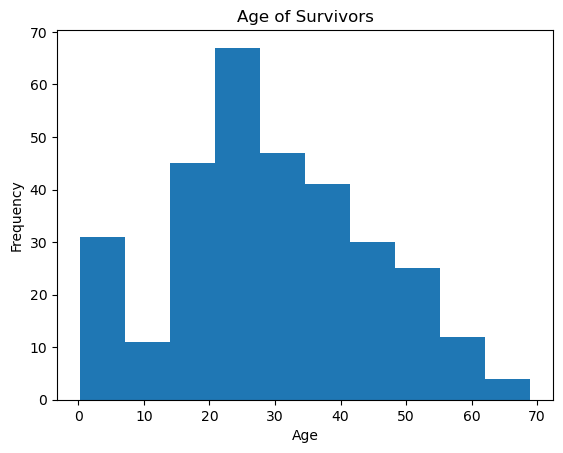

In [18]:
# import matplotlib
import matplotlib.pyplot as plt

# show survivors age count
df_survivors = df[df['Survived'] == 1]
plt.hist(df_survivors['Age'].dropna())
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age of Survivors')
plt.show()

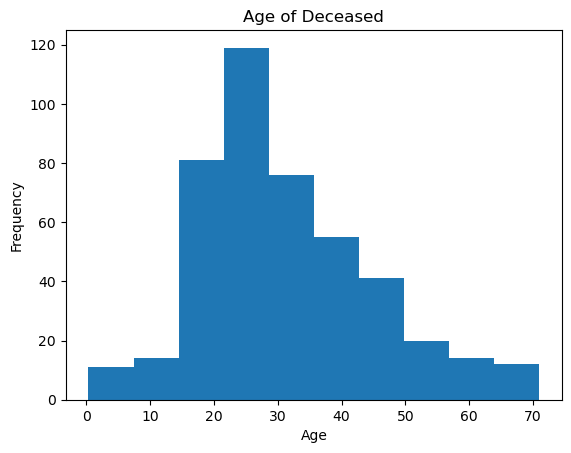

In [19]:
# show deceased age count
df_deceased = df[df['Survived'] == 0]
plt.hist(df_deceased['Age'].dropna())
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age of Deceased')
plt.show()

### 5.1 Normal distribution check

In [20]:
# check if observations have an approximately normal distribution

stat1, p_value_surv = shapiro(df_survivors['Age'])
stat2, p_value_dec = shapiro(df_deceased['Age'])
p_value_surv, p_value_dec

(0.0004997574724256992, 1.4614509602495218e-09)

In [21]:
# p_value < alpha
# reject H0
# it's not normally distributed
# therefore it's non-parametric

### 5.2 Not normally distributed -> run t-test

In [22]:
# import numpy
import numpy as np

# var and number of survivors
v_ratio = np.var(df_survivors['Age'], ddof=1)/np.var(df_deceased['Age'], ddof=1)
n=df_survivors.shape[0]

In [23]:
# import mannwhiteneyu
from scipy.stats import mannwhitneyu

# run test
stat, p_value = mannwhitneyu(df_survivors['Age'], df_deceased['Age'])
p_value

0.1916806692683456

In [24]:
# p_value > alpha
# fail to reject H0

In [25]:
# drop NULL values (survivors)
# check if observations have an approximately normal distribution (age of survivors)
shapiro(df_survivors.dropna()["Age"])

ShapiroResult(statistic=0.9816868305206299, pvalue=0.0004997574724256992)

In [26]:
# p_value < alpha
# reject H0
# it's not normally distributed
# therefore it's non-parametric

In [27]:
# drop NULL values (deceased)
# check if observations have an approximately normal distribution (age of deceased)

shapiro(df_deceased.dropna()["Age"])

ShapiroResult(statistic=0.9603029489517212, pvalue=1.4614509602495218e-09)

In [28]:
# final test
mstats.kruskalwallis(list(df_survivors.dropna()["Age"].values), list(df_deceased.dropna()["Age"].values))

KruskalResult(statistic=1.705094030058628, pvalue=0.1916231342620048)

In [29]:
# p_value > alpha
# fail to reject H0
# there is a no significant difference between the age of the survivors

## 6. Were men older than women on average?

### 6.1 Gender outlook

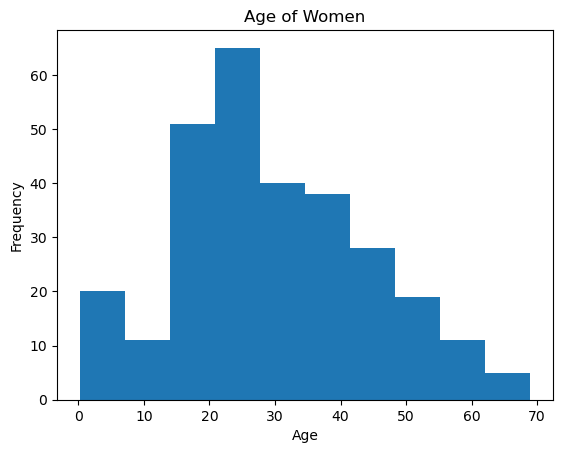

In [30]:
# women age count
df_women = df[df['Sex'] == "female"]
plt.hist(df_women['Age'])
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age of Women')
plt.show()

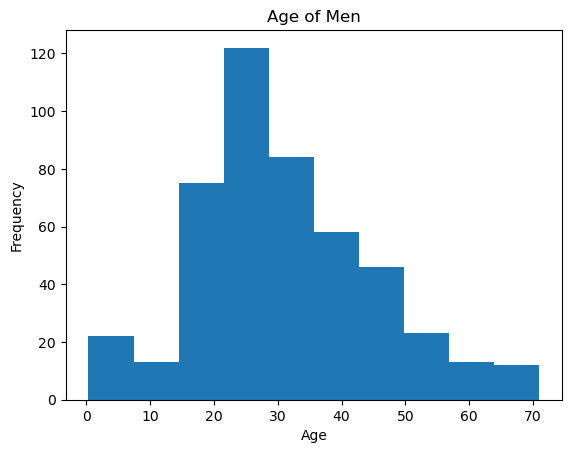

In [31]:
# men age count
df_men = df[df['Sex'] == 'male']
plt.hist(df_men['Age'])
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age of Men')
plt.show()

In [32]:
# drop NULL values (women)
# check if observations have an approximately normal distribution (age of women)
shapiro(df_women.dropna()["Age"])

ShapiroResult(statistic=0.9780285358428955, pvalue=0.0002067548339255154)

In [33]:
# p_value < alpha
# reject H0
# it's not normally distributed
# therefore it's non-parametric

In [34]:
# drop NULL values (men)
# check if observations have an approximately normal distribution (age of men)
shapiro(df_men.dropna()["Age"])

ShapiroResult(statistic=0.9732698202133179, pvalue=1.5184357948783145e-07)

In [35]:
# p_value < alpha
# reject H0
# it's not normally distributed
# therefore it's non-parametric

In [36]:
# final test
mstats.kruskalwallis(list(df_women.dropna()["Age"].values), list(df_men.dropna()["Age"].values))

KruskalResult(statistic=3.2924415762245487, pvalue=0.06959945498042894)

In [37]:
# p_value > alpha
# fail to reject H0
# there is a no significant difference between the age within men and whithin women

### 6.2 Significant difference between man and women age?

In [38]:
# wilcoxon method

In [39]:
# check shape
df_women.shape, df_men.shape

((288, 7), (468, 7))

In [40]:
# check df_women dataset format
df_women.head(1)

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1


In [41]:
# select df_women age (all rows)
df_women['Age']

0       29.0
1        2.0
3       25.0
6       63.0
8       58.0
        ... 
1276    10.0
1278    30.0
1283    14.0
1293    45.0
1304    15.0
Name: Age, Length: 288, dtype: float64

In [42]:
# alternative method
df_women.iloc[:, 3]

0       29.0
1        2.0
3       25.0
6       63.0
8       58.0
        ... 
1276    10.0
1278    30.0
1283    14.0
1293    45.0
1304    15.0
Name: Age, Length: 288, dtype: float64

In [43]:
# append men age column

# empty list
x=[]


for i in range(df_women.shape[0]):
    x.append(df_men.iloc[i, 3])
    
df_women['men_age'] = x

/var/folders/q0/yzzvs92s18169djfs6dhj5lm0000gn/T/ipykernel_11740/930204261.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women['men_age'] = x


### 6.3 Wilcoxon

In [44]:
# import wilcoxon
from scipy.stats import wilcoxon

# run test
stat, p_value = wilcoxon(df_women['Age'], df_women['men_age'], mode='approx')
p_value

0.0001905370814245288

In [45]:
# p_value < alpha
# reject H0
# there is a significant difference between man and women age